# Start using SIFT for Image classification using OpenCV3

This guide is based on the course examples from Coursera  Image classification course, week 1.  
https://www.coursera.org/learn/clasificacion-imagenes/  
  
The base guide was designed to work on OpenCV2, and the tutorials present on the OpenCV website for openCV2 and 3. Nonetheless, while implementing it, I found some errors. Therefore I present this guide in order to overcome such difficulties.  


## Basic start

In [ ]:
import cv2
import numpy as np
from PIL import Image

imageName = 'a0004.jpg'
img = cv2.imread(imageName)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Errors:

While excecuting these lines on openCV3:  
detector=cv2.FeatureDetector_create('SIFT')  
descriptor = cv2.DescriptorExtractor_create('SIFT')  
kpts=detector.detect(gray) ##Original Code  
  
I get the error:  
module 'cv2' has no attribute 'FeatureDetector_create'.  
  
Workaround:  

In [37]:
sift = cv2.xfeatures2d.SIFT_create()
(kpts, descs) = sift.detectAndCompute(gray, None)
print("Key points: ",len(kpts), "Descriptors shape: ",descs.shape)

Key points:  756 Descriptors shape:  (756, 128)


The previous workaround detail is in the Opencv3 tutorial:  http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html . Nonetheless, in the step:   img=cv2.drawKeypoints(gray,kp).  
  
This produces as error:  
Required argument 'outImage' (pos 3) not found.  
  
Work around:  


In [31]:
imgX=cv2.drawKeypoints(gray,kpts,np.array([]))

But, following the tutorial, to see the image the line: cv2.imshow("Keypoints", im_with_keypoints) produces: 
error: /feedstock_root/build_artefacts/opencv_1492078523629/work/opencv-3.2.0/modules/highgui/src/window.cpp:583: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage. Workaround:

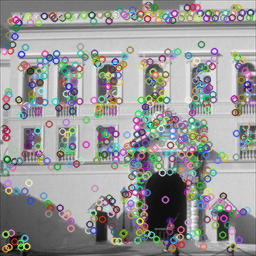

In [32]:
from PIL import Image
imgX=Image.fromarray(np.uint8(imgX))
imgX.show()#Opens a new window
imgX#To show in this markdown

## Improvements

With the beta tutorial information: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro  
show ratio and direction  

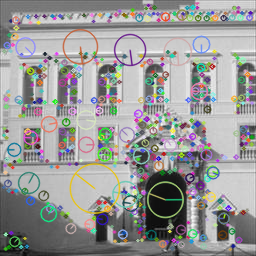

In [20]:
imgX=cv2.drawKeypoints(gray,kpts,np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgX=Image.fromarray(np.uint8(imgX))
imgX.show()#Opens a new window
imgX#To show in this markdown

And to change the colors into red:  
new tuple is (r,g,b) format  

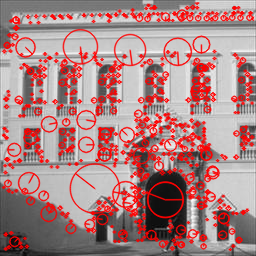

In [33]:
imgX=cv2.drawKeypoints(gray,kpts,np.array([]),(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgX=Image.fromarray(np.uint8(imgX))
imgX.show()#Opens a new window
imgX#To show in this markdown

Show most/less N important key points  

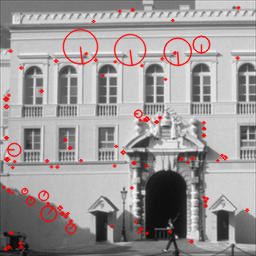

In [55]:
N=100
kptSorted = (sorted(kpts, key = lambda x:x.response,reverse=False))[0:N]
imgX=cv2.drawKeypoints(gray,kptSorted,np.array([]),(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgX=Image.fromarray(np.uint8(imgX))
#imgX.show()#Opens a new window
imgX

## Summary code

Key points:  756 Descriptors shape:  (756, 128)
Done in 0.09601640701293945 secs.



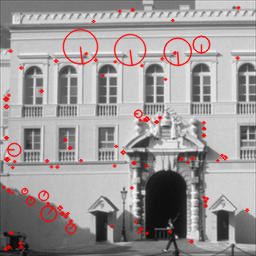

In [59]:
import cv2
import numpy as np
from PIL import Image
import time

imageName = 'a0004.jpg'
img = cv2.imread(imageName)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
init=time.time()##Measure time taken
(kpts, descs) = sift.detectAndCompute(gray, None)
end=time.time()

print("Key points: ",len(kpts), "Descriptors shape: ",descs.shape)
print('Done in '+str(end-init)+' secs.')
print('')

N=100
kptSorted = (sorted(kpts, key = lambda x:x.response,reverse=False))[0:N]
imgX=cv2.drawKeypoints(gray,kptSorted,np.array([]),(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgX=Image.fromarray(np.uint8(imgX))
#imgX.show()#Opens a new window

#Optional save image:
imgX.save(imageName+'_with_'+str(N)+'_KeyPoints.jpg')

imgX#To show in this markdown
